In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
from scipy import stats
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xlsxwriter
pd.options.mode.chained_assignment = None  # default='warn'
import statsmodels.api as sm
from statsmodels.formula.api import ols
## https://www.kaggle.com/code/alexmaszanski/two-way-anova-with-python/notebook
from scipy.stats import linregress
import glob
import researchpy as rp
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import re
from statsmodels.stats.anova import AnovaRM
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

currdir = os.getcwd()
parent = os.path.dirname(currdir)
gparent = os.path.dirname(parent)
parent


'/home/poojaparameswaran/Documents/SoderlingLab/MEA_analysis'

In [39]:
biculoc = f"{parent}/data/Div19_Bicucilin"
basal = pd.read_csv(f"{biculoc}/Div19_basal/Div19 H11 5th batch of gRNAs plate 3 basal(000)(000)_CompiledData.csv", skiprows = 10).iloc[3:14]
bicu26uM = pd.read_csv(f"{biculoc}/Div19_26uMbicucilin/Div19 H11 5th batch of gRNAs plate 3 bicuculine 26microM(000)(000)_CompiledData.csv", skiprows=10).iloc[3:14]
bicu2uM = pd.read_csv(f"{biculoc}/Div19_2uMbicucilin/Div19 H11 5th batch of gRNAs plate 3 bicuculine 2microM(000)(000)_CompiledData.csv", skiprows=10).iloc[3:14]
bicu6uM = pd.read_csv(f"{biculoc}/Div19_6uMbicucilin/Div19 H11 5th batch of gRNAs plate 3 bicuculine 6microM(000)(000)_CompiledData.csv", skiprows=10).iloc[3:14]

In [44]:
basal.columns

Index(['Unnamed: 0', 'GPR37L 1', 'GPR37L 2', 'LGI2 A12', 'SLITRK5', 'THSD7 1',
       'THSD7 2', 'unt1', 'unt2', 'Unnamed: 9'],
      dtype='object')

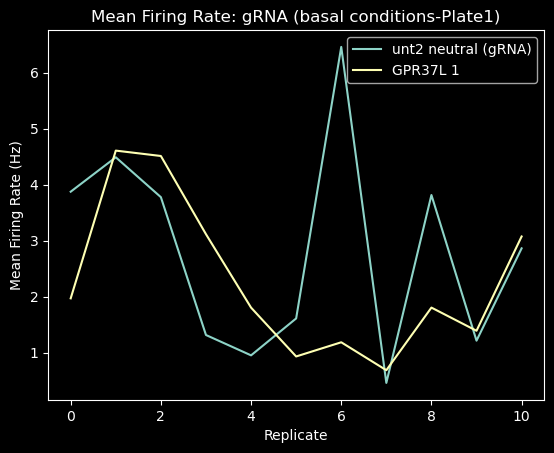

In [55]:
# for i, x in enumerate(basal.columns):
#     if "Unnamed" not in x and i < 3:
#         plt.plot(range(0, len(basal[x])), [float(x) for x in basal[x]], label=x)
#### plot unt2 vs gene 
title = f'Mean Firing Rate: gRNA (basal conditions-Plate1)'

plt.plot(range(0, len(basal['unt2'])), [float(x) for x in basal['unt2']], label='unt2 neutral (gRNA)')
plt.plot(range(0, len(basal['GPR37L 1'])), [float(x) for x in basal['GPR37L 1']], label='GPR37L 1')
plt.legend()
plt.title(title)
plt.xlabel('Replicate')
plt.ylabel('Mean Firing Rate (Hz)')
plt.savefig(f"{parent}/raw_data_comparisonplots/{title}")
plt.show()

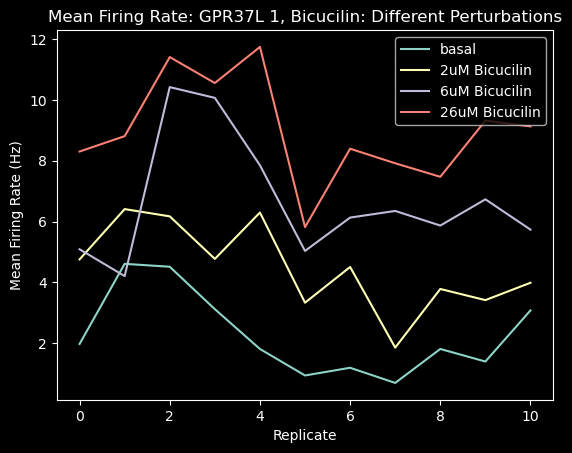

In [56]:
title = f'Mean Firing Rate: GPR37L 1, Bicucilin: Different Perturbations'

plt.plot(range(0, len(basal['GPR37L 1'])), [float(x) for x in basal['GPR37L 1']], label='basal')
plt.plot(range(0, len(bicu2uM['GPR37L 1'])), [float(x) for x in bicu2uM['GPR37L 1']], label='2uM Bicucilin')
plt.plot(range(0, len(bicu6uM['GPR37L 1'])), [float(x) for x in bicu6uM['GPR37L 1']], label='6uM Bicucilin')
plt.plot(range(0, len(bicu26uM['GPR37L 1'])), [float(x) for x in bicu26uM['GPR37L 1']], label='26uM Bicucilin')

plt.legend()
plt.title(title)
plt.xlabel('Replicate')
plt.ylabel('Mean Firing Rate (Hz)')
plt.savefig(f"{parent}/raw_data_comparisonplots/{title}")
plt.show()